In [3]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import datetime as dt
from datetime import datetime


from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
#importing the dataset and understanding its different features.

df = pd.read_csv('superstoresales.csv', encoding='unicode_escape')
df.describe(include = "all")

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
count,8399.000000,8399.000000,8399,8399,8399,8399.000000,8399.000000,8399,8399,8399,8399,8399,8399
unique,NaN,NaN,1418,48,5,NaN,NaN,795,13,8,3,17,1263
top,NaN,NaN,9/15/2011,01-01-2009,High,NaN,NaN,Darren Budd,Ontario,West,Office Supplies,Paper,"Global High-Back Leather Tilter, Burgundy"
freq,NaN,NaN,20,223,1768,NaN,NaN,41,1826,1991,4610,1225,24
mean,4200.000000,29965.179783,NaN,NaN,NaN,25.571735,1775.878179,NaN,NaN,NaN,NaN,NaN,NaN
std,2424.726789,17260.883447,NaN,NaN,NaN,14.481071,3585.050525,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,3.000000,NaN,NaN,NaN,1.000000,2.240000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2100.500000,15011.500000,NaN,NaN,NaN,13.000000,143.195000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4200.000000,29857.000000,NaN,NaN,NaN,26.000000,449.420000,NaN,NaN,NaN,NaN,NaN,NaN
75%,6299.500000,44596.000000,NaN,NaN,NaN,38.000000,1709.320000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(8399, 13)

In [6]:
#checking null values
df.isnull().sum()

Row ID                  0
Order ID                0
Order Date              0
Month Year              0
Order Priority          0
Order Quantity          0
Sales                   0
Customer Name           0
Province                0
Region                  0
Product Category        0
Product Sub-Category    0
Product Name            0
dtype: int64

In [7]:
#check if there are any dupicated rows

num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  0


# Exploratory Data Analysis 

In [8]:
#check for average sales per product name


product_avg = df.groupby('Product Name')['Sales'].mean()
product_avg

Product Name
"While you Were Out" Message Book, One Form per Page      91.894000
#10 Self-Seal White Envelopes                            323.862000
#10 White Business Envelopes,4 1/8 x 9 1/2               474.359231
#10- 4 1/8" x 9 1/2" Recycled Envelopes                  263.598235
#10- 4 1/8" x 9 1/2" Security-Tint Envelopes             173.053750
                                                           ...     
i500plus                                                1852.706750
i600                                                     996.406833
iDEN i550                                               6264.185500
iDEN i95                                                1465.701750
iDENi80s                                                1615.051000
Name: Sales, Length: 1263, dtype: float64

In [9]:
sorted_product_avg = product_avg.sort_values(ascending=False)
sorted_df = pd.DataFrame({'Product Name': sorted_product_avg.index, 'Average Sales': sorted_product_avg.values})
sorted_df.head()

,Product Name,Average Sales
0,Polycom ViewStation ISDN Videoconferencing Unit,36471.995714
1,Canon Image Class D660 Copier,21098.482500
2,Hewlett Packard LaserJet 3310 Copier,19488.035000
3,Polycom ViaVideo Desktop Video Communications...,19444.043333
4,"Riverside Palais Royal Lawyers Bookcase, Royal...",18772.193636


So, these are the five highest purchased items by our customers

In [10]:
#check for average Sales by different provinces

country = df.groupby('Province')['Sales'].mean()
country

Province
Alberta                  1970.857215
British Columbia         1680.957180
Manitoba                 1731.209057
New Brunswick            2118.301930
Newfoundland             1255.171555
Northwest Territories    2032.607435
Nova Scotia              1762.347764
Nunavut                  1473.120044
Ontario                  1677.553384
Prince Edward Island     1940.204976
Quebec                   1933.668476
Saskachewan              1604.004183
Yukon                    1800.493304
Name: Sales, dtype: float64

So, the highest average sales are from New Brunswick and Northwest Territories.
The lowest sales are from Newfoundland province.

In [11]:
#Average sales per customer

avg_sales_per_cus = df.groupby('Customer Name')['Sales'].sum()
print(avg_sales_per_cus)

Customer Name
Aaron Bergman      11630.5900
Aaron Hawkins      27690.7255
Aaron Smayling      8835.3235
Adam Bellavance    11577.5800
Adam Hart          26114.2645
                      ...    
Vivian Mathis      29420.8900
William Brown      38872.5900
Xylona Price       18037.0855
Yana Sorensen       1987.1600
Yoseph Carroll     10535.3180
Name: Sales, Length: 795, dtype: float64


In [12]:
sorted_sale_cus = avg_sales_per_cus.sort_values(ascending=False)
sorted_cus = pd.DataFrame({'Customer Name': sorted_sale_cus.index, 'Average Sales': sorted_sale_cus.values})
sorted_cus.head()

,Customer Name,Average Sales
0,Emily Phan,117124.4380
1,Deborah Brumfield,97433.1355
2,Roy Skaria,92542.1530
3,Sylvia Foulston,88875.7575
4,Grant Carroll,88417.0025


In [13]:
#label encoding the customer names as there is no column with customer id
  
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Customer Name'. 
df['Customer Name']= label_encoder.fit_transform(df['Customer Name']) 
  
len(df['Customer Name'].unique())

795

In [14]:
#Calculate average transaction size by product categories

avg_transaction_size = df.groupby('Product Category')['Sales'].mean()
print(avg_transaction_size)

Product Category
Furniture          3003.822820
Office Supplies     814.048178
Technology         2897.941008
Name: Sales, dtype: float64


You can see that the average sales is highest for the furniture category.

In [15]:
#get the latest purchase dates for all customers

latest_purchase_dates = df.groupby('Customer Name')['Month Year'].max()
print(latest_purchase_dates)

Customer Name
0      11-01-2010
1      12-01-2011
2      12-01-2010
3      10-01-2012
4      12-01-2012
          ...    
790    11-01-2012
791    12-01-2012
792    12-01-2012
793    11-01-2009
794    10-01-2012
Name: Month Year, Length: 795, dtype: object


In [16]:
#creating a new dataframe to track for Recency and other metrics

rfm_metrics = pd.DataFrame(latest_purchase_dates)


In [17]:
rfm_metrics.head()

,Month Year
Customer Name,
0,11-01-2010
1,12-01-2011
2,12-01-2010
3,10-01-2012
4,12-01-2012


In [18]:
rfm_metrics['Month Year'] = rfm_metrics['Month Year'].astype(str)
rfm_metrics['Latest Purchase Date'] = pd.to_datetime(rfm_metrics['Month Year'])
rfm_metrics.drop(['Month Year'], axis = 1, inplace = True)
rfm_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 794
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Latest Purchase Date  795 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.4 KB


In [19]:
rfm_metrics

,Latest Purchase Date
Customer Name,
0,2010-11-01
1,2011-12-01
2,2010-12-01
3,2012-10-01
4,2012-12-01
...,...
790,2012-11-01
791,2012-12-01
792,2012-12-01


In [20]:
# Calculating how recently different customers have made purchases with us.

current_date = pd.to_datetime('today').date()
rfm_metrics['Recency'] = (current_date - rfm_metrics['Latest Purchase Date'].dt.date).dt.days

In [21]:
rfm_metrics["Average Sales"] = avg_sales_per_cus


In [22]:
rfm_metrics.head()

,Latest Purchase Date,Recency,Average Sales
Customer Name,,,
0,2010-11-01,4725,NaN
1,2011-12-01,4330,NaN
2,2010-12-01,4695,NaN
3,2012-10-01,4025,NaN
4,2012-12-01,3964,NaN


In [23]:
#Frequency

rfm_metrics['Frequency'] = df.groupby('Customer Name').agg({'Order ID': 'nunique'})


In [24]:
#calculate monetary value by summing up the sales

rfm_metrics['Monetary'] = df.groupby('Customer Name').agg({'Sales': 'sum'})
rfm_metrics.head()

,Latest Purchase Date,Recency,Average Sales,Frequency,Monetary
Customer Name,,,,,
0,2010-11-01,4725,NaN,5,11630.5900
1,2011-12-01,4330,NaN,9,27690.7255
2,2010-12-01,4695,NaN,8,8835.3235
3,2012-10-01,4025,NaN,8,11577.5800
4,2012-12-01,3964,NaN,18,26114.2645


# Check for Outliers in the RFM values.


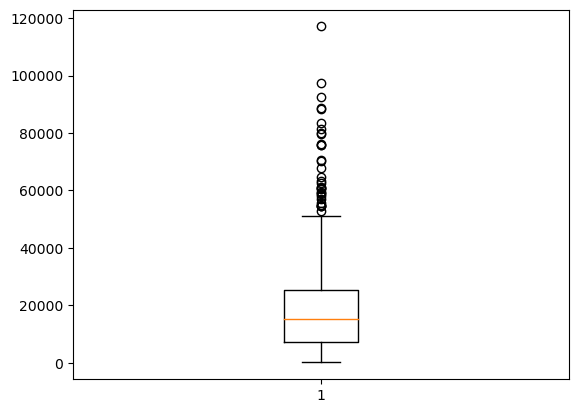

In [25]:
plt.boxplot(rfm_metrics['Monetary'])
plt.show()


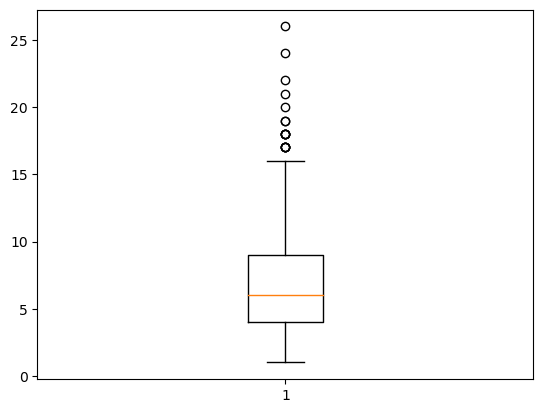

In [26]:
plt.boxplot(rfm_metrics['Frequency'])
plt.show()


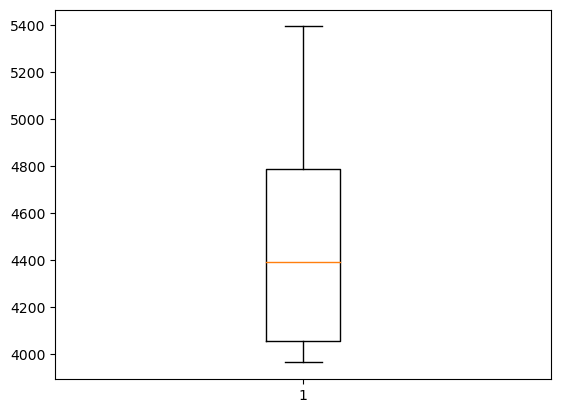

In [27]:
plt.boxplot(rfm_metrics['Recency'])
plt.show()

You can see that the outliers for Monetary and Frequency are considerable whereas Recency doesn't show any outliers as such.

AS we know kmeans clustering and even hierarchhical clustering utilise the distance bwtween two clusters. It would be wise to remove outliers before we run the model. I am utilizing a technique where I use only 95% of the data points in the RFM values.


In [28]:
q1_money = rfm_metrics['Monetary'].quantile(0.05)
q3_money= rfm_metrics['Monetary'].quantile(0.95)
IQR = q3_money - q1_money
rfm_metrics = rfm_metrics[(rfm_metrics['Monetary'] >= q1_money - 1.5*IQR) & (rfm_metrics['Monetary'] <= q3_money + 1.5*IQR)]

q1_freq = rfm_metrics['Frequency'].quantile(0.05)
q3_freq = rfm_metrics['Frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
rfm_metrics = rfm_metrics[(rfm_metrics['Frequency'] >= q1_freq - 1.5*IQR) & (rfm_metrics['Frequency'] <= q3_freq + 1.5*IQR)]

q1_rec = rfm_metrics['Recency'].quantile(0.05)
q3_rec = rfm_metrics['Recency'].quantile(0.95)
IQR = q3_rec - q1_rec
rfm_metrics = rfm_metrics[(rfm_metrics['Recency'] >= q1_rec - 1.5*IQR) & (rfm_metrics['Recency'] <= q3_rec + 1.5*IQR)]


Now, I am going to standardise the data for our clustering analysis

In [29]:
# For RFM analysis model, I am standardizing the data using a Standard Scaler for the model

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_metrics[['Recency', 'Frequency', 'Monetary']])

In [30]:
scaled_data

array([[ 0.56534107, -0.51808111, -0.44671196],
       [-0.41579801,  0.55033519,  0.55932948],
       [ 0.49082417,  0.28323111, -0.62181347],
       ...,
       [-1.32490408,  0.01612704, -0.0453953 ],
       [ 1.47196325, -0.25097704, -1.05079716],
       [-1.1733864 ,  0.01612704, -0.51532215]])

# Hopkin's Statistic

To check the cluster tendency of the dataset

In [31]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
rfm_scaled = pd.DataFrame(scaled_data)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled.head()
hopkins(rfm_scaled)

0.8660038967627816

So, the current dataset has a very high cluster tendency.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


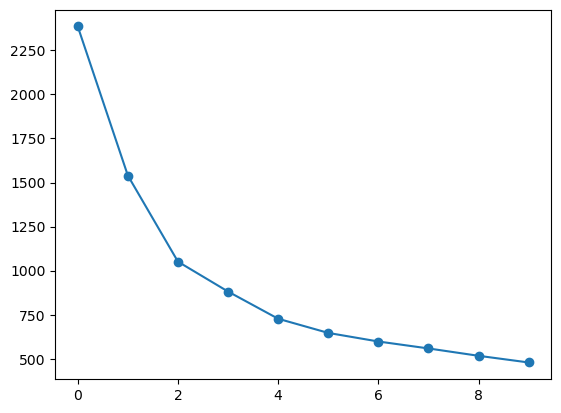

In [33]:
#using the elbow method to understand the number of clusters 

inertia = []
for i in np.arange(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(inertia, marker='o')

So, you can see that the elbow point is 3 in the above graph.

# K-Means clustering 

First model of clustering

In [34]:
# now use the number of clusters as 3 to divide all the customers into different clusters

kmeans = KMeans(n_clusters=3, random_state=42)
rfm_metrics['Cluster'] = kmeans.fit_predict(scaled_data)


rfm_metrics #to see which cluster does each customer belongs



,Latest Purchase Date,Recency,Average Sales,Frequency,Monetary,Cluster
Customer Name,,,,,,
0,2010-11-01,4725,NaN,5,11630.5900,0
1,2011-12-01,4330,NaN,9,27690.7255,1
2,2010-12-01,4695,NaN,8,8835.3235,0
3,2012-10-01,4025,NaN,8,11577.5800,2
4,2012-12-01,3964,NaN,18,26114.2645,1
...,...,...,...,...,...,...
790,2012-11-01,3994,NaN,11,29420.8900,1
791,2012-12-01,3964,NaN,15,38872.5900,1
792,2012-12-01,3964,NaN,7,18037.0855,2


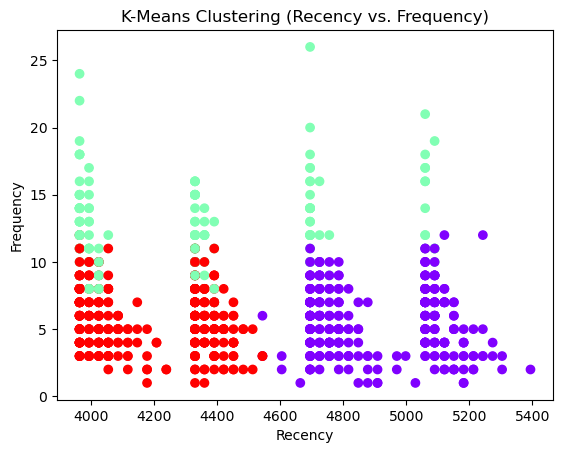

In [35]:
# Visualize the clusters 
plt.scatter(rfm_metrics['Recency'], rfm_metrics['Frequency'], c=rfm_metrics['Cluster'], cmap='rainbow')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('K-Means Clustering (Recency vs. Frequency)')
plt.show()




In [36]:
#Now let's study the clusters for their mean RFM values.

group = rfm_metrics.groupby(['Cluster'])['Recency', 'Frequency','Monetary'].mean()
group

C:\Users\dolcy\AppData\Local\Temp\ipykernel_18392\191950927.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = rfm_metrics.groupby(['Cluster'])['Recency', 'Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,4903.022581,5.570968,13862.429905
1,4355.879195,12.704698,41274.004577
2,4185.916667,5.645833,13298.871641


So, a popular way of segmenting the customers is to define these clusters as Average, Loyal/Whales or Oppurtunity customers. I am going to divide the customers on Monetary Value

So, based on our clusters and their mean RFM values, I am designating the different clusters as follows

Cluster 0 = Average (their recency and frequecy are poorest so they are our older customers, we should check in/follow up with them to see if they need restocking, or send in surveys or discounts to get them back to the store.)

Cluster 1 = Whales (great on frequency and monetary aspects, however not as recent; these are loyal customers)

Cluster 2 = Oppurtunity (These customers are our most recent ones and their order values have been low, but if we target them, we can bring them up)


In [37]:
#writing a function to create a column which let's us know which customer is an Average, Whale or Oppurtunity.

def func(row):
    if row['Cluster']==1:
        return "Whale"
    elif row['Cluster']==0:
        return "Average"
    else:
        return "Oppurtunity"


In [38]:
rfm_metrics["Condition"] = rfm_metrics.apply(func, axis=1)
rfm_metrics

,Latest Purchase Date,Recency,Average Sales,Frequency,Monetary,Cluster,Condition
Customer Name,,,,,,,
0,2010-11-01,4725,NaN,5,11630.5900,0,Average
1,2011-12-01,4330,NaN,9,27690.7255,1,Whale
2,2010-12-01,4695,NaN,8,8835.3235,0,Average
3,2012-10-01,4025,NaN,8,11577.5800,2,Oppurtunity
4,2012-12-01,3964,NaN,18,26114.2645,1,Whale
...,...,...,...,...,...,...,...
790,2012-11-01,3994,NaN,11,29420.8900,1,Whale
791,2012-12-01,3964,NaN,15,38872.5900,1,Whale
792,2012-12-01,3964,NaN,7,18037.0855,2,Oppurtunity


In [39]:
result = rfm_metrics['Condition'].value_counts()
result

Oppurtunity    336
Average        310
Whale          149
Name: Condition, dtype: int64

So, now we can see that the highest number of customers we have are the Oppurtunity ones.

Inferences:

1. The company needs to ensure that the oppurtunity customers are retained better : They are our most recent customers, we can follow up with them to check if their order have been okay, discuss about other products that they might need.
2. The company can target the Average customers to convert them into Whales as they as there has been considerable time passed since their last order. We should get in touch with them, targeting emails based on their previous orders.
3. Our whales aren't most the recent customers, however they have brought in most of the revenue, if we can quantify their loyalty by creating a "loyalty plan" where we can offer them certain points based on the scale of their most recent purchase.

Understanding the different customers with respect to the RFM metrics.


<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

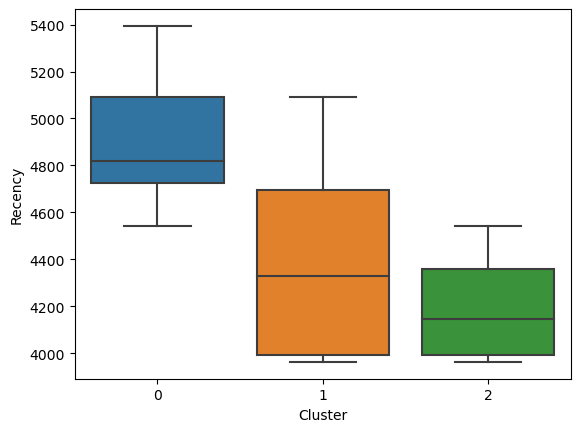

In [40]:
sns.boxplot(x='Cluster', y='Recency', data=rfm_metrics)

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

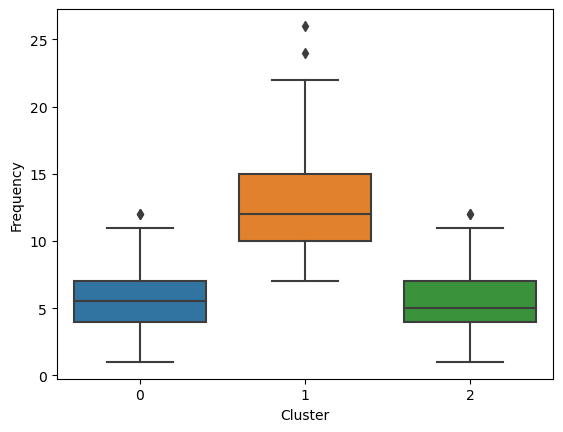

In [41]:
sns.boxplot(x='Cluster', y='Frequency', data=rfm_metrics)

<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

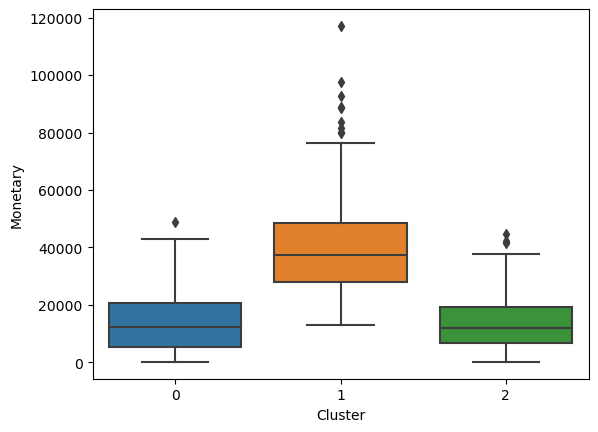

In [42]:
sns.boxplot(x='Cluster', y='Monetary', data=rfm_metrics)

# Heirarchical clustering

Second model for clustering

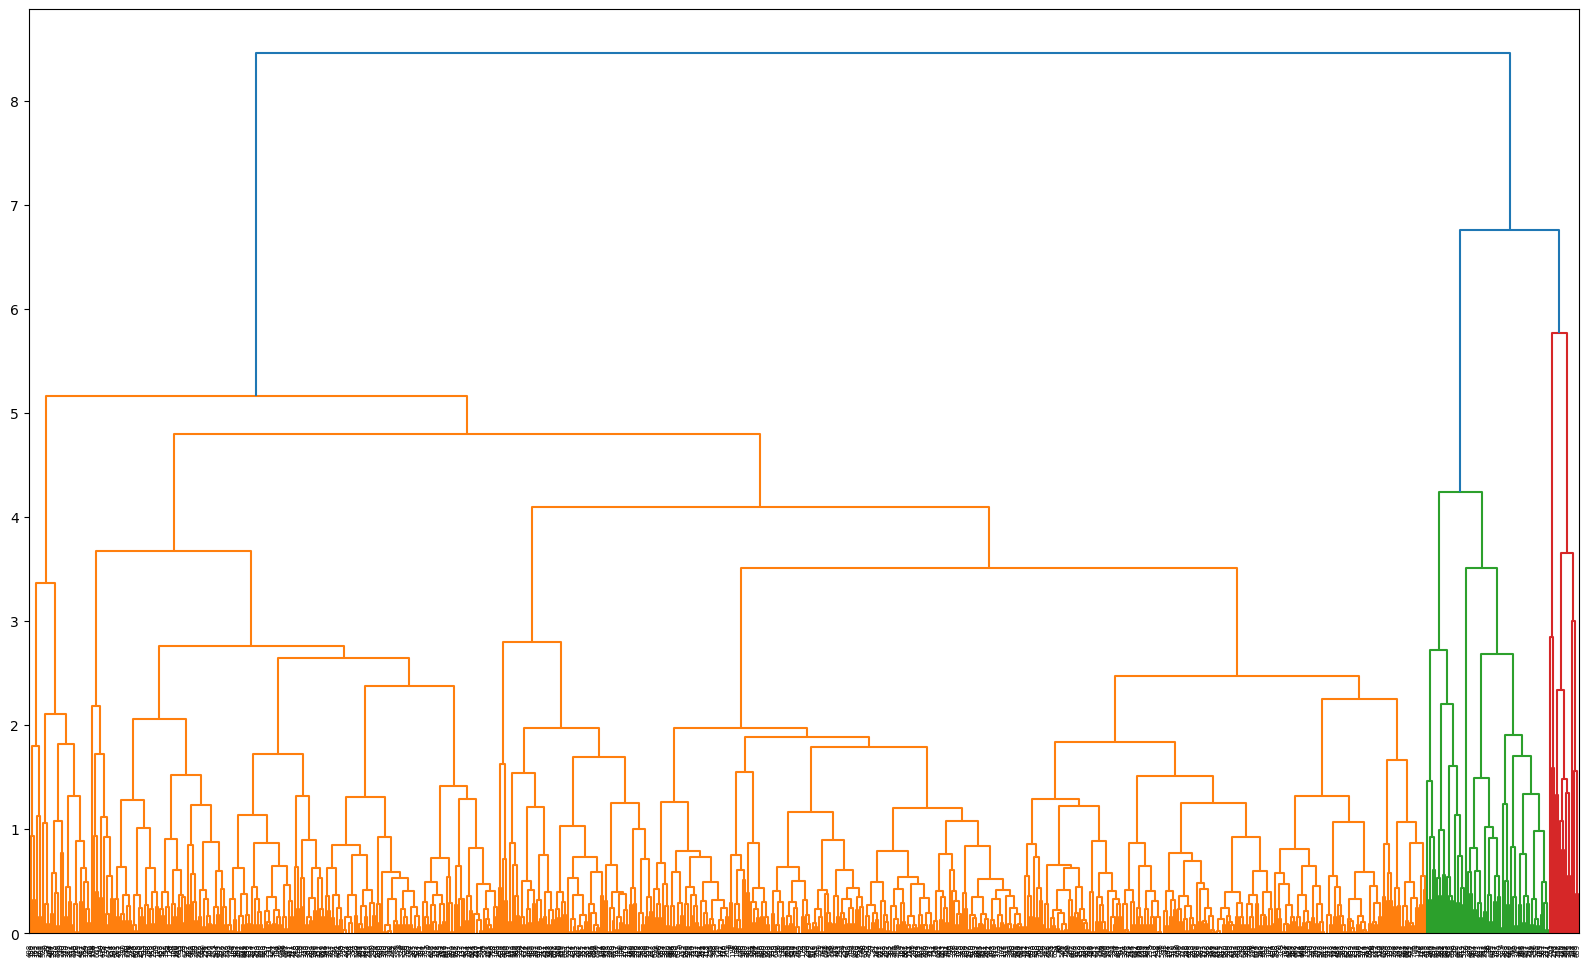

In [43]:
# complete linkage
plt.figure(figsize=(20,12))

mergings = linkage(scaled_data, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
#new cluster labels using the second model

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
# assign cluster labels
pd.set_option('display.max_rows', None)
rfm_metrics['cluster_labels'] = cluster_labels
rfm_metrics.head(90)

,Latest Purchase Date,Recency,Average Sales,Frequency,Monetary,Cluster,Condition,cluster_labels
Customer Name,,,,,,,,
0,2010-11-01,4725,NaN,5,11630.5900,0,Average,0
1,2011-12-01,4330,NaN,9,27690.7255,1,Whale,0
2,2010-12-01,4695,NaN,8,8835.3235,0,Average,0
3,2012-10-01,4025,NaN,8,11577.5800,2,Oppurtunity,0
4,2012-12-01,3964,NaN,18,26114.2645,1,Whale,1
5,2010-10-01,4756,NaN,10,20059.6755,0,Average,0
6,2011-11-01,4360,NaN,2,23088.5345,2,Oppurtunity,0
7,2010-07-01,4848,NaN,3,795.8200,0,Average,0
8,2012-11-01,3994,NaN,5,4615.5400,2,Oppurtunity,0


In [46]:
result_hc = rfm_metrics['cluster_labels'].value_counts()
result_hc

0    717
1     63
2     15
Name: cluster_labels, dtype: int64

In [47]:
group_hc = rfm_metrics.groupby(['cluster_labels'])['Recency', 'Frequency','Monetary'].mean()
group_hc

C:\Users\dolcy\AppData\Local\Temp\ipykernel_18392\1312510346.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_hc = rfm_metrics.groupby(['cluster_labels'])['Recency', 'Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
cluster_labels,,,
0,4523.479777,6.103208,15635.085078
1,4174.349206,14.063492,40513.729857
2,4607.466667,17.000000,76858.656133


Now, we can see that the RFM metrics on the basis of Heirarchical clustering are different.

Here, 

the cluster 0 will be the lapsed customers

the cluster 1 will be our Average customers.

the cluster 2 will be our Whales/Loyal customers

<AxesSubplot:xlabel='cluster_labels', ylabel='Recency'>

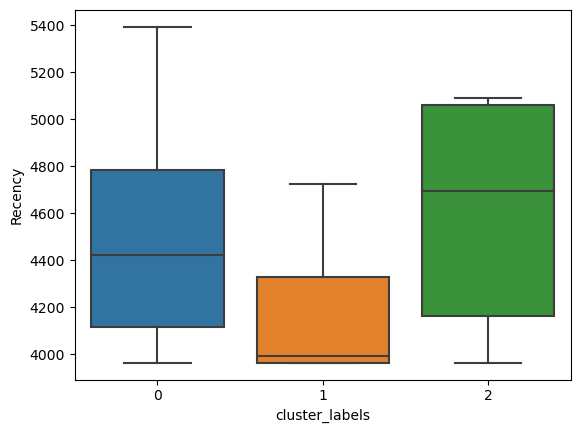

In [51]:
sns.boxplot(x='cluster_labels', y='Recency', data=rfm_metrics)


<AxesSubplot:xlabel='cluster_labels', ylabel='Frequency'>

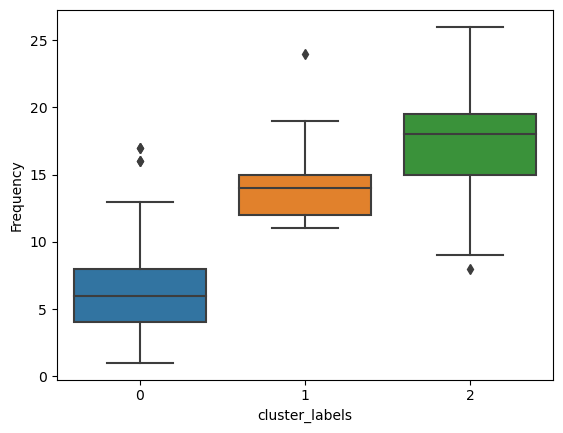

In [49]:
sns.boxplot(x='cluster_labels', y='Frequency', data=rfm_metrics)


<AxesSubplot:xlabel='cluster_labels', ylabel='Monetary'>

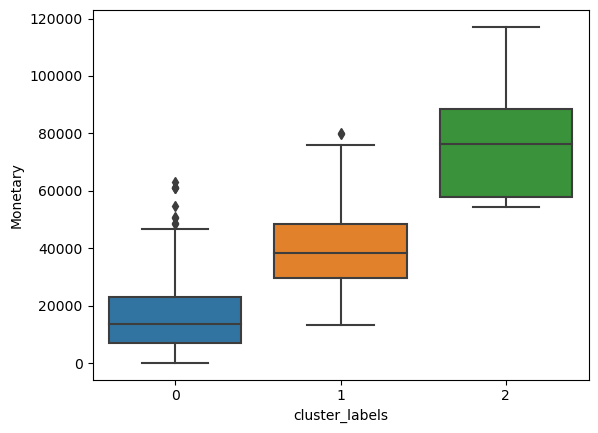

In [50]:
sns.boxplot(x='cluster_labels', y='Monetary', data=rfm_metrics)